In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
PATH_ROOT = "drive/MyDrive/RonenRojasEfratMorin/Code/Data/CAMELS/Streamflow/"

In [ ]:
!pip install climata

     |████████████████████████████████| 216 kB 7.7 MB/s 
     |████████████████████████████████| 255 kB 49.9 MB/s 
     |████████████████████████████████| 6.3 MB 46.8 MB/s 
     |████████████████████████████████| 65 kB 3.2 MB/s 
  Created wheel for climata: filename=climata-0.5.0-py3-none-any.whl size=28450 sha256=cb0d2d591c469d6b1f3d1ea27e2af7eff9b61daef95884655dedc22c2dcfa602
  Stored in directory: /root/.cache/pip/wheels/8e/8a/f8/7175fa238c5729c941f6f60cea479d6200b74f7208ee05aa6f
  Created wheel for wq.io: filename=wq.io-1.1.0-py3-none-any.whl size=20526 sha256=60ddf94ff17feebe9ead6fa6d517660ccd5a99d15a1cc39a58cbf6afe4d81c2b
  Stored in directory: /root/.cache/pip/wheels/c8/27/ca/68abd9cbf739b4dba06e81ae1bc2ce0a8907131ee85e0a0e83
  Created wheel for suds-jurko: filename=suds_jurko-0.6-py3-none-any.whl size=454304 sha256=1b7f7e6efaa25accca504eea87ba7b7777e02723deed1955fd5712f75e85c106
  Stored in directory: /root/.cache/pip/wheels/f4/75/2a/54353e9cd47f7dd7861856a750c5f99f05da1ccf6241

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from climata.usgs import DailyValueIO
from climata.usgs import InstantValueIO
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import numpy as np
import datetime

FT2M = 0.3048

register_matplotlib_converters()
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [ ]:
# set parameters
#station_id = "06452000"  #"06730200"
#station_id = "13340000"
#station_id = "02315500"
#station_id = "07226500"
#station_id = "07068000"
#station_id = "03164000"
#station_id = "05585000"
#station_id = "08164000"
#station_id = "07292500"
station_id = "02231000"

param_id = "00060"
start_time = pd.to_datetime('1980-01-01 00:00:00')
end_time = pd.to_datetime('2021-09-15 00:00:00')

data = InstantValueIO(
    start_date=start_time,
    end_date=end_time,
    station=station_id,
    parameter=param_id,
)
##/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
#import sys

In [ ]:
# Change from 15-min to hourly resolution, and from ft^3/s to m^3/s and to UTC
# TODO: fornow I assume delta time is 15 min and units are f^3/s - to generalize later
FT2M = 0.3048
for series in data:
    flow = [r[1] for r in series.data]
    datetimes = [r[0] for r in series.data]

ls = []
for i in range(0,len(datetimes)):
  t = datetimes[i].astimezone(datetime.timezone.utc)
  ls.append([t.year,t.month,t.day,t.hour,t.minute,flow[i]*(FT2M**3)])

df = pd.DataFrame(data=ls, columns=['year','month','day','hour','minute','flow'])
df_group = df.groupby(by=['year','month','day','hour']).mean()
df_group = df_group.assign(minute=0)
df_group.loc[df_group['flow']<0 , 'flow'] = np.nan

filename = PATH_ROOT+'dis_'+station_id+'.csv'
df_group.to_csv(filename)


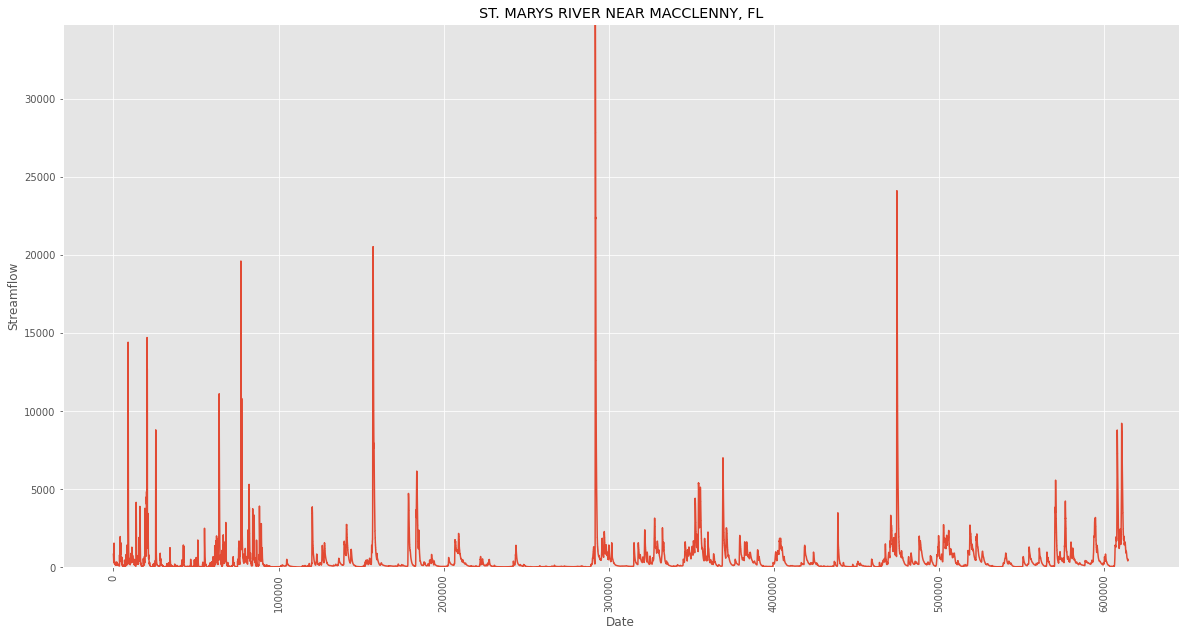

In [ ]:
#plt.plot(flow*(FT2M**3))
plt.plot(flow)
plt.xlabel('Date')
plt.ylabel('Streamflow')
plt.title(series.site_name)
plt.xticks(rotation='vertical')
plt.ylim([0,max(flow)])
plt.show()